<a href="https://colab.research.google.com/github/felesKitty/dz2/blob/master/ml4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?Export=view&id=14xJDOqeXH8Wv6jYu3qRkYnxOyDYPish-'>


# **PyTorch**



- Мотивация:
  
  - Нейронные сети - это просто алгоритм 
  - Нейронные сети очень популярный алгоритм 
  - Необходимо быстро строить нейронные сети и обучать их на примерах

- Немного теории нейронных сетей:

  - нейроны - основная единица вычислений в нейронных сетях (у него есть изменяемая часть: веса и нелинейность: активационная функция)
  - нейронные сети состоят из нейронов, которые связаны между сосбой 
  - нейронов очень много
  - для обучения используем подгонку весов нейрона по ошибкам нейронной сети
  - для обучения используется дифференцирование вдоль всей нейронной сети сравнительно простых функций(нейронов), но делаем это очень много раз
  - все вычисления ориентированы на матричные операции над большими многомерными массивами

<img src='https://drive.google.com/uc?export=view&id=1b7jZHNgIpI_PyYyhul4YtlNnVLJrb0i_' width = 500>


- Что делают нейросетевые фреймвоки:

  - все такие фреймвоки ориентированы на построение и обучение сетей 
  - часть из них (TensorFlow, PyTorch) - символьные - формируют граф вычислений и поддерживают процесс автоматического дифференцирования (которого в нейронках очень много)
  - цель фреймвоков глубокого обучения, перенести основную работу исследователя/разработчика в плоскость поиска оригинальных моделей, поддержав его на рутинных этапах разработки 


## **Pytorch:**

  - PyTorch был впервые представлен компанией Facebook в октябре 2016 года. 

  - PyTorch достаточно удобен и прост: работа с тензорами очень похожа на работу с numpy arrays

  - PyTorch также поддерживает автоматическое дифференцирование и использует динамический граф вычислений.

  - PyTorch де-факто является исследовательской структурой, имееет огромный зоопарк моделей из самых свежих статей и массу реализованых SOTA (например, на HuggingFace)

## **Установка:**

In [ ]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Начинаем работать**

  - импорт базовых модулей

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Основная вычислительная единица - тензор

<img src='https://drive.google.com/uc?export=view&id=1ykMsDyuK9UvXXEQXBsY2SIo8rE3hkvVn'>

Можно создавать тензоры:

In [ ]:
x=torch.Tensor(3,2,2)
x

tensor([[[9.3659e-36, 0.0000e+00],
         [3.7835e-44, 0.0000e+00]],

        [[       nan, 0.0000e+00],
         [1.3733e-14, 6.4069e+02]],

        [[4.3066e+21, 1.1824e+22],
         [4.3066e+21, 6.3828e+28]]])

Можно создавать тензоры разными средствами:

In [ ]:
a=torch.rand(2,3)
a

tensor([[0.0043, 0.3430, 0.6604],
        [0.4257, 0.2262, 0.3215]])

In [ ]:
b=torch.ones(2,3)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

## Тензоры и вычислительные устройства
  - Тензоры размещаем в памяти (это данные для работы наших моделей)
  - 2 типа памяти и устройств обработки:  CPU и GPU :
Операции между тензорами должны
выполняться на одном устройстве

In [ ]:
a=a.cuda(device = 0)
a

tensor([[0.0043, 0.3430, 0.6604],
        [0.4257, 0.2262, 0.3215]], device='cuda:0')

## Вычислительный граф

Вычислительный граф — это иллюстрированная запись какой-либо функции, состоящая из вершин и рёбер. Вершины (или узлы) — вычислительные операции, которые необходимо выполнить, а рёбра связывают их в определённую последовательность.

Автоматическое дифференцирование - строительный блок не только в Pytorch, но и в каждой другой DL библиотеке. Движок автоматического дифференцирования в Pytorch называет [Autograd](https://pytorch.org/docs/stable/autograd.html). 

Современные архитектуры нейронных сетей могут иметь миллионы обучающихся параметров. С вычислительной точки зрения тренировка сети состоит из двух фаз:

1) Прямой проход для вычисления значения функции потерь.  
2) Обратный проход для вычисления градиентов обучаемых параметров.

Прямой проход весьма прямолинеен: выход одного слоя является входом другого.
Обратный проход немного сложнее, поскольку он требует от нас использования цепного правила для вычисления градиентов весов относительно функции потерь.

<img src='https://drive.google.com/uc?export=view&id=1dza4BZyuWzeOU9hciSMzNuvOiWAcSrHo' width = 500>


## Как работает вычисление в PyTorch:  
  
  - Выражение разбивается на части, которые вычисляются
последовательно и нанизываются на общую структуру графа как отдельные узлы.
  - Каждый узел графа: независимый кусок кода, которому
для работы нужны лишь входы (а еще мы умеем для него определить производную).
  - Преимущества: параллельная обработка.

## Примеры вычислительных графов в представлении Pytorch:

<img src='https://drive.google.com/uc?export=view&id=1NYvXlsf_tVnt8KAWQS8XaBHAl8XK6pDD'>




## Автоматическое дифференцирование

Компонент тензора .grad содержит градиент:
значение или функцию

Как это реализовано: все математические операции (+,-,*,/…) с тензорами перегружены.
  - Каждая операция с тензорами проверяет, нужно ли вычислять градиент(компонент класса torch.Tensor requires_grad == True)
  - Каждый torch.Tensor содержит компоненты:
 grad (значение градиента) или
 grad_fn(ссылка на функцию вычисления градиента)
  - Вызов z.backward() запускает проход по графу вычислений в обратную сторону, с вызовом функций grad_fn

In [ ]:
from torch.autograd import Variable

In [ ]:
x=Variable(torch.ones(2,2)*2,requires_grad = True)

In [ ]:
z = 2 * (x * x) + 5 * x

In [ ]:
z.backward(torch.ones(2, 2))

In [ ]:
print(x.grad)

tensor([[13., 13.],
        [13., 13.]])


**Вопрос:** Когда не нужно вычислять градиент?


Простая сеть:
  - соберем регрессию у(Х): 2 координаты Х = <x1,x2>
  - используем 2-х слойную сеть 


<img src='https://drive.google.com/uc?export=view&id=1hzJfCGs2GF31xW3b_pt0gUJ5OikZLbd3' width = 500>

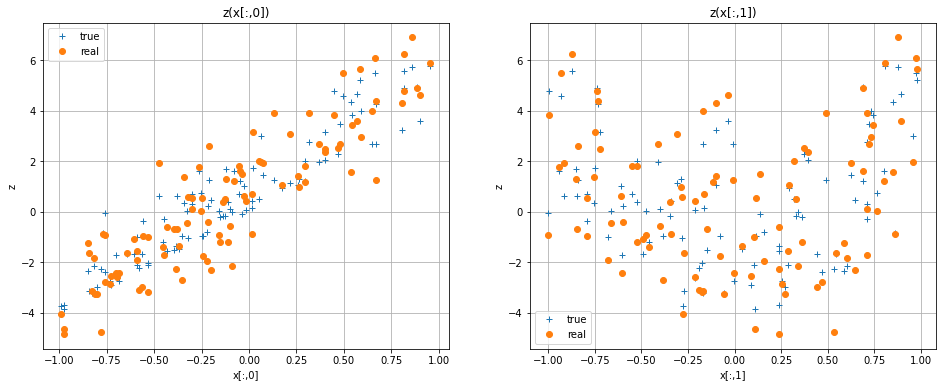

In [ ]:
#  задаем входные переменные (признаки)
x = torch.rand(100,2) * 2 - 1 # входные признаки


# задаем функцию, которая нас интересует
def func_(x):
  return x[:,0] * 4 + x[:,1] ** 2 * 3 

z = func_(x) # идеальная регрессия

y = func_(x) + torch.randn((z.size())) # измеренная регрессия

# для проверки модели создадим еще данных
xt = torch.rand(50,2) * 2 - 1 # входные признаки
yt = func_(xt) + torch.randn((xt.shape[0])) # измеренная регрессия test

# нарисуем У(Х)
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.plot(x[:,0].numpy() , z ,'+',label = 'true')
plt.plot(x[:,0].numpy() , y, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,0]')
plt.ylabel('z')
plt.title('z(x[:,0])')

plt.subplot(1,2,2)
plt.plot(x[:,1].numpy() , z ,'+', label = 'true')
plt.plot(x[:,1].numpy() , y, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,1]')
plt.ylabel('z')
plt.title('z(x[:,1])')

plt.show()

Нейронные сети часто описываются в виде слоёного торта, где каждый слой состоит из входных, скрытых или выходных клеток. Клетки одного слоя не связаны между собой, а соседние слои обычно полностью связаны. 

Создаем класс для обработки информации из слоев (будет 2-х слойная нейронная сеть):
<img src='https://drive.google.com/uc?export=view&id=1hzJfCGs2GF31xW3b_pt0gUJ5OikZLbd3' width = 200>

In [ ]:
import torch.nn as nn
class Perceptron(nn.Module):
    def __init__(self, n = 3):
        # n - число нейронов скрытого слоя
        super().__init__()
        self.fc1 = nn.Linear(2, n) # первый слой
        self.fc2 = nn.Linear(n, 1) # второй слой
        #
        self.sigm = nn.Sigmoid() # активация скрытого слоя
    
    # собственно схема работы сети
    def forward(self, x):
        #print('input', x)
        xx = self.fc1(x)
        #print('output fc1', xx)
        xx = self.sigm(xx)
        xx = self.fc2(xx)
        output = xx# 
        #print('output', output)
        return output

**Вопрос:** Сколько в сети параметров для настройки?

Такие сети обучаются по **методу обратного распространения ошибки**, в котором сеть получает множества входных и выходных данных. Этот процесс называется обучением с учителем, и он отличается от обучения без учителя тем, что во втором случае множество выходных данных сеть составляет самостоятельно. Вышеупомянутая ошибка является разницей между вводом и выводом. Если у сети есть достаточное количество скрытых нейронов, она теоретически способна смоделировать взаимодействие между входным и выходными данными. Практически такие сети используются редко, но их часто комбинируют с другими типами для получения новых.

По сути - это последовательность матричных умножений

Создаем саму сеть и указываем число нейронов скрытого слоя:

In [ ]:
perc = Perceptron(n = 3)
# нам нужен способ оценки промаха модели - функция потерь
criterion = torch.nn.MSELoss()
# нам нужен механизм для вычисления новых значений весов нейронов - оптимизатор
optimizer = torch.optim.SGD(perc.parameters(), lr=0.01)
# сюда будем записывать значения потерь по мере обучения
history = []
history_test = []
# начальный номер эпохи обучения
test_epoch = 0

perc

Perceptron(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
  (sigm): Sigmoid()
)

## Цикл обучения:
  - разршить сери обучаться
  - очистить градиенты
  - сделать прямой проход
  - вычислить потери
  - совершить шаг обратного распространения
  - провести коррекцию параметров сети
  - записать значения потерь на наборе для обучения и теста (логирование)
  - проверить условие окончания работы сети


Epoch 0: train loss: 3.3867743015289307
Epoch 40: train loss: 2.913651704788208
Epoch 80: train loss: 2.5320515632629395
Epoch 120: train loss: 2.2400689125061035
Epoch 160: train loss: 2.0261037349700928
Epoch 200: train loss: 1.8745580911636353
Epoch 240: train loss: 1.7699581384658813
Epoch 280: train loss: 1.6991008520126343
Epoch 320: train loss: 1.6517032384872437
Epoch 360: train loss: 1.6202243566513062


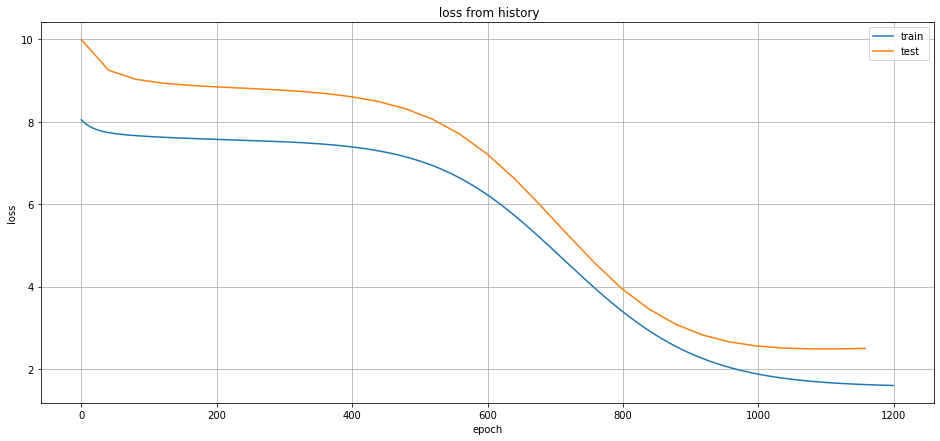

In [ ]:
# разршить сети обучаться
perc.train()
epochs = 400

for epoch in range(epochs):
    # очистить градиенты
    optimizer.zero_grad()

    # сделать прямой проход
    y_pred = perc(x)

    # вычислить потери
    loss = criterion(y_pred.squeeze(), y)
   
    # совершить шаг обратного распространения
    loss.backward()

    # провести коррекцию параметров сети
    optimizer.step()

    # записать значения потерь на наборе для обучения и теста (логирование)
    history += [loss.item()]
    if epoch % 40 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        perc.eval()
        yp = perc(xt)
        loss_test = criterion(yp.squeeze(), yt)
        history_test += [[epoch+test_epoch,loss_test.item()]]
      
        perc.train()

test_epoch += epoch 
# визуализация результата
ht = np.array(history_test)
plt.figure(figsize = (16,7))
plt.plot(history,label = 'train')
plt.plot(ht[:,0],ht[:,1],label = 'test')
plt.title(' loss from history')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend() 
plt.show()       

In [ ]:
# Так выглядит инференс нейронной сети по входным данным
perc.eval()
perc(torch.FloatTensor(xt[0,:]))

tensor([4.4637], grad_fn=<AddBackward0>)

Посмотрим на результат работы сети после обучения:

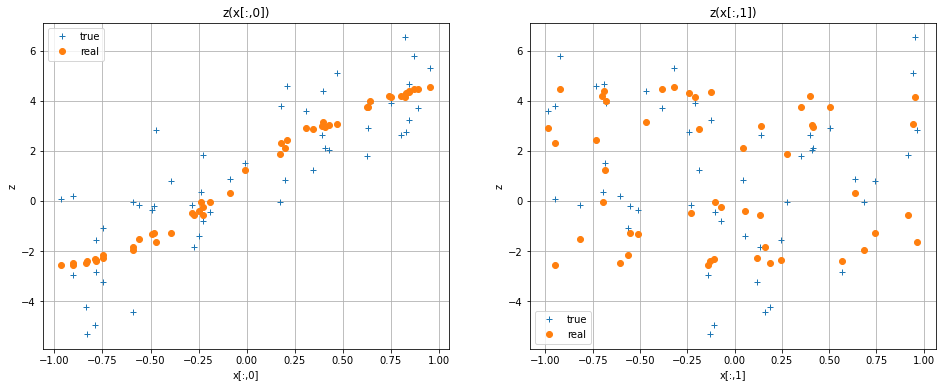

In [ ]:
perc.eval()
ypt = perc(torch.FloatTensor(xt))
ypt = ypt.detach()

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.plot(xt[:,0].numpy() , yt ,'+',label = 'true')
plt.plot(xt[:,0].numpy() , ypt, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,0]')
plt.ylabel('z')
plt.title('z(x[:,0])')

plt.subplot(1,2,2)
plt.plot(xt[:,1].numpy() , yt ,'+', label = 'true')
plt.plot(xt[:,1].numpy() , ypt, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,1]')
plt.ylabel('z')
plt.title('z(x[:,1])')

plt.show()

## **Задача классификации котиков и не котиков!!!**

Задача классификации изображений состоит в том, чтобы
каждому изображению поставить в соответствие класс,
которому оно принадлежит

## Данные:
Данные можно скачать на сайте kaggle по этой ссылке https://www.kaggle.com/datasets/tongpython/cat-and-dog

Наши данные : КАРТИНКИ цветные и различной формы, но на всех есть одна/несколько кошек или собак (2 класса : кошки/собаки). 

С картинками работают сверточные нейронные сети: 

<img src='https://drive.google.com/uc?export=view&id=1cYAGe004AuXrut8aCvMI-kCjmqRNu0b1' width = 500>

[https://www.google.ru/about/main/machine-learning-qa/  тут взята картинка и там еще много интересных картинок - блог Googl]


Сверточные нейронные сети совсем не так выглядят как многослойный перцептрон, но все это работает очень похоже. А матриц и операций над ними становится еще больше.

**Вопрос:** Сколько каналов у входного тензора в нейросети для анализа изображений?

In [ ]:
#для скорости : даннные записали на Googl диск и читаем с него
from google.colab import drive
drive.mount('/gdrive')

path = '/gdrive/MyDrive/geekbrain/PyTorch/BootCamp/'

Mounted at /gdrive


Сначала добавим еще модулей

In [ ]:
import torch
import time
import cv2 # обработка изображений
import os
from PIL import Image

# функции для работы в нейронной сети
import torch.nn.functional as F
# разные инструменты для создания и обучения нейросети
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable
import torchvision
from torchvision import models
# обработка изображений в нейросети
import torchvision.datasets as dset
import torchvision.transforms as transforms # преобразования изображений работы с нейронкой

import warnings
warnings.simplefilter("ignore")

# планируем решать все проблемы в GPU
device = torch.device("cuda")
# цикл обучения
def train(model, epoch, device = device, train_dataloader = None):
    model.train()
    for idx, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)# прямой проход
        #оценим потери
        loss = criterion(output, target)
        loss.backward()# обратный шаг
        optimizer.step()# коррекция

        if idx % 10 == 0:
            print("epoch: ", epoch, "  process: ", int((idx / len(train_dataloader)) * 100),
                "%  Loss: ", loss.data.item())
    # сохраним модель
    torch.save(model.state_dict(), 'checpoint_epoch'+str(epoch)+'.pt')

# цикл теста
def test(model,device = device, test_dataloader = None):
    model.eval()
    test_loss = 0
    correct = 0
    print('Test:')
    with torch.no_grad():
        for idx,(data, target) in enumerate(test_dataloader):
            data, target = data.to(device), target.to(device)
            #прямой проход
            output = model(data)
            #потери теста
            test_loss += criterion(output, target).data.item()
            _, predicted = torch.max( output, 1)# определение класса объектов

        if idx % 10 == 0:
            print("epoch: ", epoch, "  process: ", int((idx / len(test_dataloader)) * 100),' test:', correct)   
    
    test_loss /= len(test_dataloader.dataset)
    print("Average Loss: ", test_loss)
 



Создадим структуру для чтения и предобработки картинок:

In [ ]:
class DataSet_cat_dog(torch.utils.data.dataset.Dataset):
    def __init__(self, mode=1, list_name=[],target=[],SIZE = 128 ):
        super(DataSet_cat_dog, self).__init__()
        self.dirs = list_name
        self.target = target
        self.size_im =SIZE
        self.mode = mode
        #print(self.target.shape)
            
    def __len__(self):
        return len(self.dirs)
    
    def __getitem__(self, index):
          img_dir, class_name = self.dirs[index],self.target[index]
          
          img = Image.open(img_dir) # читаем изображение из файла
          #преобразуем и изменяем(аугментируем)
          #img = cv2.imread(img_dir) # читаем изображение из файла
          #try:
          #  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          #except:
          #  pass  
          #img = cv2.resize(img, (self.size_im,self.size_im))
          img = img.resize((self.size_im,self.size_im), Image.ANTIALIAS)
          img
          if self.mode:
            if np.random.randn(1)>0:
              img = img.transpose(Image.FLIP_LEFT_RIGHT)
              #img = cv2.flip(img, 1)
          img = np.array(img)
          img = img.transpose((2, 0, 1)).astype(np.float32) / 255.
          # создаем числовой код класса текущего изображения ([0, 1] - cat, [1,0] - dog)
          class_name = np.array([class_name, 1- class_name]).astype(np.float32)

          return img, class_name
        


Читаем имена картинок из рабочих каталогов и проверяем корректность открытия данных (берем только картинки больше 50 пикселей по высоте)

In [ ]:
# проверяем размер и возможность открыть картинку
def image_test(list_im,target):
  out_list = []
  out_tar = []
  for name,targ in zip(list_im,target):
    try:
      #img = cv2.imread(name)
      #if img.shape[0]>50:
      if os.path.isfile(name) and (os.path.splitext(name)[-1] == '.jpg'):
        out_list += [name]
        out_tar += [targ]
    except:
      pass
  return out_list, out_tar        

# каталоги для чтения картинок
train_path =path + 'training_set/training_set/'
test_path =path + 'test_set/test_set/'
list_tr_cat = os.listdir(train_path+ 'cats')[:600]
list_tr_dog = os.listdir(train_path+ 'dogs')[:600]
list_test_cat = os.listdir(test_path+ 'cats')[-600:]
list_test_dog = os.listdir(test_path+ 'dogs')[-600:]


# список имен файлов изображений для тренировки и тестов
# тренировочные изображения
train_name = [train_path+'cats/'+ name for name in list_tr_cat] + [train_path+'dogs/'+ name for name in list_tr_dog]
train_target = [1]*len(list_tr_cat)+[0]*len(list_tr_dog)
train_name,train_target = image_test(train_name,train_target)
# перемешаем классы
ind = np.arange(len(train_name))
np.random.shuffle(ind)
train_target = np.array(train_target)[ind.tolist()]
train_name = np.array(train_name)[ind.tolist()]
# тестовые изображения
val_name = [test_path+'cats/'+ name for name in list_test_cat] + [test_path+'dogs/'+ name for name in list_test_dog]
val_target = [1]*len(list_test_cat)+[0]*len(list_test_dog)
val_name,val_target = image_test(val_name,val_target)
# перемешаем классы
ind = np.arange(len(val_name))
np.random.shuffle(ind)
val_target = np.array(val_target)[ind.tolist()]
val_name = np.array(val_name)[ind.tolist()]


print("read data")
print("train size: {}".format(int(len(train_name))))
print("val size: {}".format(int(len(val_name))))

FileNotFoundError: ignored

Обозначаем имена классов:

In [ ]:
class_ = ['cat','dog']

Создаем механизм загрузки картинок из заданнных директорий пакетами определенного размера (batch_size)

In [ ]:
# создаем загрузчики изображений для нашей сети

batch_size = 64 # размер пакета изображений

def train_test_Dataset(list_name,target,batch_size, aug = 0):
    dataset = DataSet_cat_dog(mode=aug, list_name=list_name,target=target,SIZE = 128 )
    dataloader = torch.utils.data.DataLoader( dataset,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=4)
    return dataloader                               

# загрузчики для тренировки и теста
train_dataloader = train_test_Dataset(train_name,train_target,batch_size, aug = 1)
test_dataloader = train_test_Dataset(val_name,val_target,batch_size, aug = 0)

Посмотрим на наши картинки через генератор загрузки пакетов train_dataloader:
  - на каждом шаге раболты вернет картинки и их метки в виде пакета , заданного размера
  - пакеты собираются "налету" и не занимают много памяти - сможем обучать довольно большие сети на очень больших данных

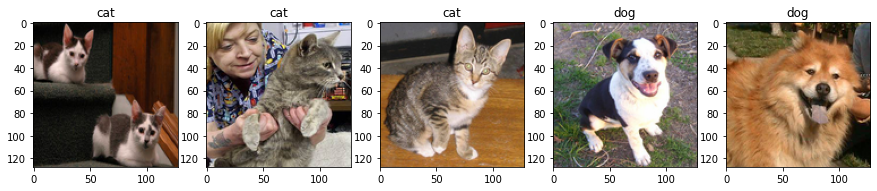

In [ ]:
n = 5
for I_L in train_dataloader:
  I,L = I_L
  plt.figure(figsize=(3*n,7))
  for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(I[i,:,:,:].permute([1,2,0])/I[i,:,:,:].max())
    plt.title(class_[L.numpy().astype('int')[i,1]])
  plt.show()
  break

Собираем нейросеть сверточного типа :    
  - сверточный слой + активация ReLU + слой максимального пуллинга (3х**128х128** -> 32х**128х128** -> 32х**64х64**(пуллинг))
  - сверточный слой + активация ReLU + слой максимального пуллинга (32х**64х64** -> 64х**64х64** -> 64х**32х32**(пуллинг))
  - сверточный слой + активация ReLU + слой максимального пуллинга (64х**32х32** -> 128х**32х32** -> 128х**16х16**(пуллинг))
  - сверточный слой + активация ReLU + слой максимального пуллинга (128х**16х16** -> 128х**16х16** -> 128х**8х8**(пуллинг))
  - плотный слой + активация ReLU ( 128 * 8 * 8 -> 128 )
  - плотный слой + активация Sigmoid ( 128 -> 2 )

**Вопрос:** Что будет, если добавить еще сверток/пуллингов?

In [ ]:

class CNN_fc(nn.Module):
    def __init__(self, input_size, n_feature, output_size, n_kernel_numb = 1):
        super(CNN_fc, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8*n_kernel_numb, kernel_size=5,  padding='same')
        self.conv2 = nn.Conv2d(8*n_kernel_numb, 16*n_kernel_numb, kernel_size=3,  padding='same')
        self.conv3 = nn.Conv2d(16*n_kernel_numb, 32*n_kernel_numb, kernel_size=3, padding='same' )
        self.conv4 = nn.Conv2d(32*n_kernel_numb, self.n_feature , kernel_size=3, padding='same')
        self.fc1 = nn.Linear(self.n_feature*(input_size // 16 )** 2, self.n_feature)
        self.fc2 = nn.Linear(self.n_feature, output_size)
       
    def forward(self, x, verbose=False):
        #print(':',x.shape)
        bs =   x.shape[-1] // 16
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)   

        x = x.view(-1, bs*bs * self.n_feature)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        x = F.sigmoid(x)
        #x = F.softmax(x, dim=1)
        return x

Это будет альтернативная сеть с уже рабочими весами (предобученная), но ориентированная на другие задачи, а мы ее заставим решать ташу задачу за счет потрясающего механизма переноса обучения (это один из наших главных инструментов работы с большими задачами)

Текущая сеть - результат обучения архитектуры ResNet18 на  ImageNet 
<img src='https://drive.google.com/uc?export=view&id=1ROVkolWFF9xq7F3M6pm1A6W0j7X5yATz' width = 700>


In [ ]:
from torchvision.models import resnet18
class ResNet(torch.nn.Module):
    def __init__(self, pretrained=True):
        super(ResNet, self).__init__()
        self.resnet = resnet18(pretrained=pretrained)
        self.resnet.fc = torch.nn.Linear(512, 2)# ориентированный на текущую задачу выход сети
    
    def forward(self, x):
        return  F.sigmoid(self.resnet(x))

In [ ]:
lr = 0.003

model = CNN_fc( 128, 128, 2, n_kernel_numb = 1).to(device)  #наша сеть 
#model = ResNet().cuda() #наша сеть с переносом обучения 
########################
# если уже есть какой-то результат обучения, что был сохранен, то его можно подгрузить
# model.load_state_dict(torch.load('checkpoint/checpoint_epoch.pt'))
# model.eval()
########################
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam( model.parameters(), lr=lr, weight_decay=1e-5)
print(model)

ResNet(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runni

Запускаем обучение:

In [ ]:
for epoch in range(20):
        start = time.time()
        train( model, epoch, train_dataloader = train_dataloader )
        end = time.time()
        print("It takes ", end - start, " seconds")
        test(model,test_dataloader = test_dataloader)

epoch:  0   process:  0 %  Loss:  0.6802288293838501
epoch:  0   process:  52 %  Loss:  0.6028322577476501
It takes  6.182265520095825  seconds
Test:
Average Loss:  0.012346714113631578
epoch:  1   process:  0 %  Loss:  0.5271426439285278
epoch:  1   process:  52 %  Loss:  0.5781857967376709
It takes  6.195929288864136  seconds
Test:
Average Loss:  0.009276206489400729
epoch:  2   process:  0 %  Loss:  0.5822767019271851
epoch:  2   process:  52 %  Loss:  0.5038821697235107
It takes  6.1326377391815186  seconds
Test:
Average Loss:  0.010455334206438741
epoch:  3   process:  0 %  Loss:  0.5082353949546814
epoch:  3   process:  52 %  Loss:  0.4663643538951874
It takes  6.082723617553711  seconds
Test:
Average Loss:  0.010573040902167185
epoch:  4   process:  0 %  Loss:  0.5432732105255127
epoch:  4   process:  52 %  Loss:  0.5364845991134644
It takes  6.057272911071777  seconds
Test:
Average Loss:  0.00844142464819901
epoch:  5   process:  0 %  Loss:  0.5062177777290344
epoch:  5   proce

Посмотрим на его результаты:

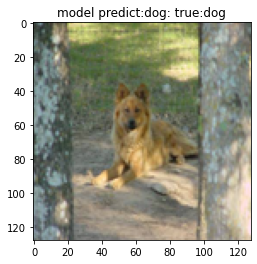

In [ ]:
for I,Lt in test_dataloader:
  plt.imshow(I[0,:,:,:].permute(1, 2, 0)/I[0,:,:,:].max())
 
  I_gpu = I.to(device)
  L = model(I_gpu)
  k = int(L.to('cpu')[0,1]>0.5)
  kt = int(Lt.to('cpu').numpy()[0,1]>0.5)
  plt.title('model predict:' + class_[k]+': true:'+class_[kt])
  plt.show()
  break

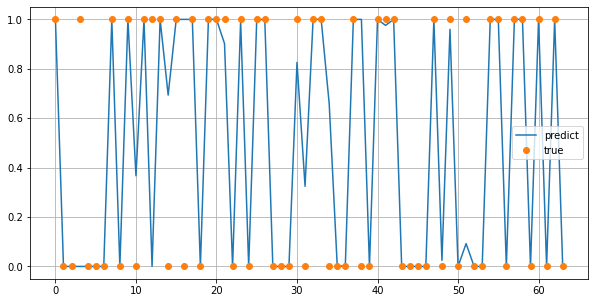

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(L.to('cpu').detach()[:,1],label = 'predict')
plt.plot(Lt.to('cpu').detach()[:,1],'o',label = 'true')
plt.legend()
plt.grid()
plt.show()

Сохраним обучение:

In [ ]:
torch.save(model, 'model1.pth')

Загружаем модель в новой переменнной

In [ ]:
model_new = torch.load('model1.pth')

Проверяем:

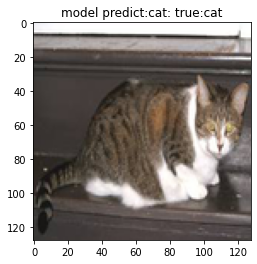

In [ ]:
model_new.eval()
plt.imshow(I[0,:,:,:].permute(1, 2, 0)/I[0,:,:,:].max())

I_gpu = I.to(device)
L = model_new(I_gpu)
k = int(L.to('cpu')[0,1]>0.5)
kt = int(Lt.to('cpu').numpy()[0,1]>0.5)
plt.title('model predict:' + class_[k]+': true:'+class_[kt])
plt.show()

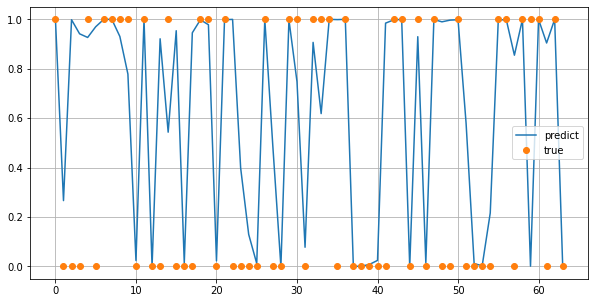

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(L.to('cpu').detach()[:,1],label = 'predict')
plt.plot(Lt.to('cpu').detach()[:,1],'o',label = 'true')
plt.legend()
plt.grid()
plt.show()

**Вопрос:** Когда перенос обучения не работает?

## Результат обучения модели:
  - маленькая модель CNN_fc - обучается намного хуже , т.к. ее приходится учить с самого начала и она не очень "умная"
  - большая модель ResNet() - обучается намного лучше, она сможет решить эту задачу и получить хороший ответ довольно быстро




## **Резюме:**

  - Нейронки могут классифицировать не только котиков
  - Для обучения нужны огромные запасы примеров с разметкой (это очень дорогая и тяжелая часть обучения)
  - Можно работать с текстами, сигналами, картинками




#  Вопросы?

Ссылки:

1. [Официальная документация PyTorch](https://pytorch.org/tutorials/)
2. [Нейроновости](https://neurohive.io/ru/novosti/)
3. [Сверточные нейронные сети на Pytorch](https://neurohive.io/ru/tutorial/cnn-na-pytorch/)
4. [Блог Google](https://www.google.ru/about/main/machine-learning-qa/)